<a href="https://colab.research.google.com/github/mahendrasiingh/ML-ASSIGNMENT/blob/main/ML_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [29]:
# Simulate Dataset
data = {
    'CustomerID': range(1, 11),
    'Frequency': [10, 5, 15, 7, 12, 6, 20, 8, 3, 14],
    'AmountSpent': [2500, 800, 3000, 1200, 2600, 950, 5000, 1500, 450, 2800],
    'ProductType': [2, 1, 3, 1, 2, 1, 3, 2, 1, 3],
    'Recency': [12, 40, 5, 25, 8, 30, 3, 20, 60, 6]
}

df = pd.DataFrame(data)
df.head(10)


,CustomerID,Frequency,AmountSpent,ProductType,Recency
0,1,10,2500,2,12
1,2,5,800,1,40
2,3,15,3000,3,5
3,4,7,1200,1,25
4,5,12,2600,2,8
5,6,6,950,1,30
6,7,20,5000,3,3
7,8,8,1500,2,20
8,9,3,450,1,60
9,10,14,2800,3,6


In [30]:
# Data Preprocessing
df_cleaned = df.drop('CustomerID', axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cleaned)
scaled_df = pd.DataFrame(scaled_data, columns=df_cleaned.columns)
scaled_df.head()


,Frequency,AmountSpent,ProductType,Recency
0,0.000000,0.321927,0.120386,-0.510879
1,-1.004024,-0.981109,-1.083473,1.096380
2,1.004024,0.705172,1.324244,-0.912693
3,-0.602414,-0.674513,-1.083473,0.235349
4,0.401610,0.398576,0.120386,-0.740487


In [31]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
df


,CustomerID,Frequency,AmountSpent,ProductType,Recency,Cluster
0,1,10,2500,2,12,1
1,2,5,800,1,40,2
2,3,15,3000,3,5,1
3,4,7,1200,1,25,0
4,5,12,2600,2,8,1
5,6,6,950,1,30,0
6,7,20,5000,3,3,1
7,8,8,1500,2,20,0
8,9,3,450,1,60,2
9,10,14,2800,3,6,1


In [ ]:
# Evaluate the Clustering Results
score = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")


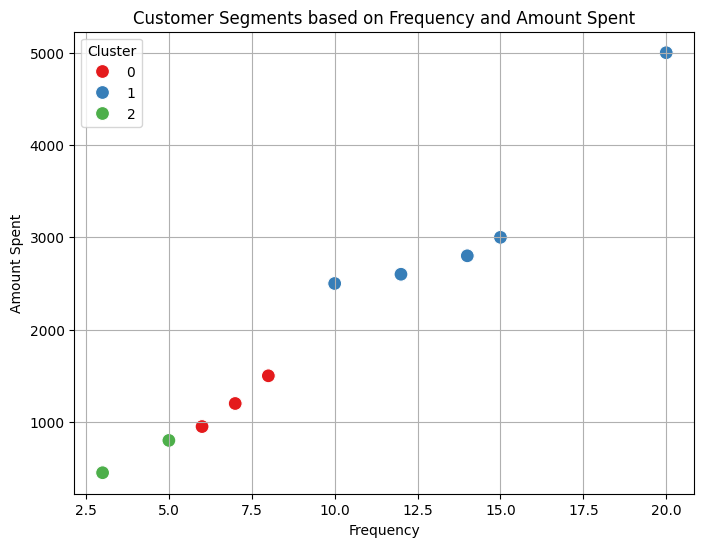

In [32]:
# Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Frequency'], y=df['AmountSpent'], hue=df['Cluster'], palette='Set1', s=100)
plt.title("Customer Segments based on Frequency and Amount Spent")
plt.xlabel("Frequency")
plt.ylabel("Amount Spent")
plt.grid(True)
plt.show()
